<a href="https://colab.research.google.com/github/adihend/dicoding-idcampml/blob/main/prediksi-gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PENUGASAN: Kadek Adi Hendrawan*

In [ ]:
!pip install tensorflow numpy matplotlib

SUMBER:
[DATASET](https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip)

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

#BELAJAR MEMBUAT MODEL PREDIKSI GAMBAR


---



---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LIBRARY**
---
> *Mengimport library yang digunakan dalam pemodelan klasifikasi gambar*





In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**TRAIN SET DAN VALIDATION SET**
---
> *Pembagian set training dan set validasi untuk membagi dataset*





In [ ]:
base_dir = 'rockpaperscissors/rps-cv-images'
num_classes = 3

# Membuat direktori train dan validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

classes = ['rock', 'paper', 'scissors']
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, cls), exist_ok=True)

    all_images = os.listdir(os.path.join(base_dir, cls))
    random.sample(all_images, int(0.4 * len(all_images)))

    for i in range(int(0.6 * len(all_images))):
        source = os.path.join(base_dir, cls, all_images[i])
        destination = os.path.join(train_dir, cls, all_images[i])
        os.replace(source, destination)

    for i in range(int(0.6 * len(all_images)), len(all_images)):
        source = os.path.join(base_dir, cls, all_images[i])
        destination = os.path.join(validation_dir, cls, all_images[i])
        os.replace(source, destination)

**IMAGE DATA GENERATOR**
---
> *Membuat data generator gambar*




In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

**OBJEK**
---
> *Membuat objek generator untuk set training dan validasi*


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',
    classes=classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',
    classes=classes
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


MODEL SEQUENTIAL
---



In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

**MODEL TRAINING**
---

> *Pelatihan model dengan Epoch 30 dan akselerasi GPU*

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/30
41/41 [==============================] - 41s 685ms/step - loss: 1.6585 - accuracy: 0.3956 - val_loss: 1.0201 - val_accuracy: 0.4692
Epoch 2/30
41/41 [==============================] - 25s 614ms/step - loss: 1.0534 - accuracy: 0.4428 - val_loss: 0.9672 - val_accuracy: 0.6986
Epoch 3/30
41/41 [==============================] - 29s 710ms/step - loss: 1.0063 - accuracy: 0.4840 - val_loss: 0.9513 - val_accuracy: 0.6884
Epoch 4/30
41/41 [==============================] - 29s 704ms/step - loss: 0.9531 - accuracy: 0.5236 - val_loss: 0.6395 - val_accuracy: 0.7180
Epoch 5/30
41/41 [==============================] - 25s 614ms/step - loss: 0.6784 - accuracy: 0.7317 - val_loss: 0.2709 - val_accuracy: 0.9521
Epoch 6/30
41/41 [==============================] - 28s 695ms/step - loss: 0.4932 - accuracy: 0.8125 - val_loss: 0.1518 - val_accuracy: 0.9623
Epoch 7/30
41/41 [==============================] - 27s 673ms/step - loss: 0.3886 - accuracy: 0.8590 - val_loss: 0.1438 - val_accuracy: 0.9623



> *Model ini mencapai akurasi sekitar 98.52% pada epoch terakhir dari pelatihan (Epoch 30/30) pada data validasi (val_accuracy: 0.9852)*



**MODEL TESTING**
---



> *Melakukan testing pada model dengan fitur import gambar ukuran resolusi (300, 200)*


Saving 0c089d38-9b25-43eb-a1e6-97799264b6ee.png to 0c089d38-9b25-43eb-a1e6-97799264b6ee (1).png
1/1 [==============================] - 0s 17ms/step


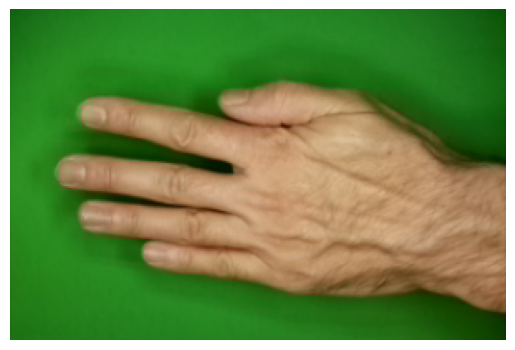

Hasil Prediksi: paper


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(300, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    classes = ['rock', 'paper', 'scissors']
    predicted_class = classes[np.argmax(prediction)]

    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

    return predicted_class

uploaded = files.upload()

uploaded_image_path = list(uploaded.keys())[0]

predicted_class = predict_uploaded_image(model, uploaded_image_path)
print(f'Hasil Prediksi: {predicted_class}')

Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9.png
1/1 [==============================] - 0s 23ms/step


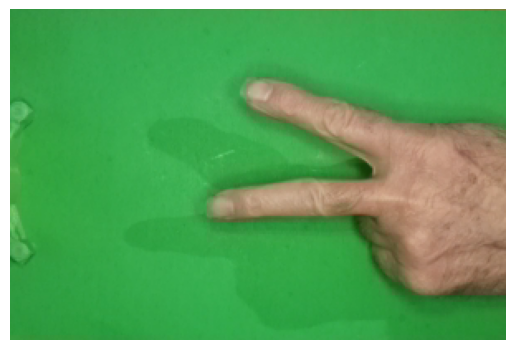

Hasil Prediksi: scissors


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(300, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    classes = ['rock', 'paper', 'scissors']
    predicted_class = classes[np.argmax(prediction)]
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    return predicted_class

uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]
predicted_class = predict_uploaded_image(model, uploaded_image_path)
print(f'Hasil Prediksi: {predicted_class}')

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
1/1 [==============================] - 0s 18ms/step


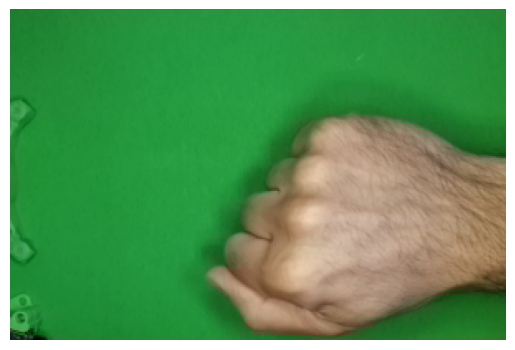

Hasil Prediksi: rock


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(300, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    classes = ['rock', 'paper', 'scissors']
    predicted_class = classes[np.argmax(prediction)]
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    return predicted_class

uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]
predicted_class = predict_uploaded_image(model, uploaded_image_path)
print(f'Hasil Prediksi: {predicted_class}')


---


TERIMAKASIH
---
---

